In [1]:
# !pip install beautifulsoup4

# 1) Install and import dependencies:

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
from tqdm import tqdm
import cv2
import urllib
from PIL import Image
# from bs4 import BeautifulSoup

from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2) Connecting to Google Drive:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3) Image preprocessing using ImageDataGenerator:

In [4]:
# parameters:

EPOCHS = 100
BATCH_SIZE = 32
NUM_CLASSES = 2
img_ht = 227
img_wdt = 227
train_dir = "/content/drive/MyDrive/datasets/AlexNet/train"
val_dir = "/content/drive/MyDrive/datasets/AlexNet/validation"
model_save_dir = "/content/drive/MyDrive/datasets/AlexNet/model"

In [5]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1

)

train_generator = train_data_generator.flow_from_directory(train_dir,
                                                           target_size = (img_ht, img_wdt),
                                                           color_mode = "rgb",
                                                           batch_size = BATCH_SIZE,
                                                           seed = 1,
                                                           shuffle = True,
                                                           class_mode = "categorical")


val_data_generator = ImageDataGenerator(rescale = 1./255.)
val_generator = val_data_generator.flow_from_directory(val_dir,
                                                           target_size = (img_ht, img_wdt),
                                                           color_mode = "rgb",
                                                           batch_size = BATCH_SIZE,
                                                           seed = 7,
                                                           shuffle = True,
                                                           class_mode = "categorical")

Found 346 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [6]:
train_num = train_generator.samples
val_num = val_generator.samples

In [7]:
train_num, val_num

(346, 113)

# 4) Defining the AlexNet Model:

In [8]:
INPUT_SHAPE = (227,227,3)
NUM_CLASSES = 2

In [53]:
AlexNet = Sequential()

# convolution and pooling 1
AlexNet.add(Conv2D(
    filters = 96, kernel_size = (11,11), strides = 4, padding = "valid", activation = "relu", input_shape = INPUT_SHAPE,
    kernel_initializer = "he_normal"
    ))
AlexNet.add(MaxPooling2D(
    pool_size = (3,3), strides = (2,2), padding = "valid", data_format = None
))


# convolution and pooling 2
AlexNet.add(Conv2D(
    filters = 256, kernel_size = (5,5), strides = 1, padding = "same", activation = "relu", kernel_initializer = "he_normal"
    ))
AlexNet.add(MaxPooling2D(
    pool_size = (3,3), strides = (2,2), padding = "valid", data_format = None
))


# convolution
AlexNet.add(Conv2D(
    filters = 384, kernel_size = (3,3), strides = 1, padding = "same", activation = "relu", kernel_initializer = "he_normal"
    ))
AlexNet.add(Conv2D(
    filters = 384, kernel_size = (3,3), strides = 1, padding = "same", activation = "relu", kernel_initializer = "he_normal"
    ))
AlexNet.add(Conv2D(
    filters = 256, kernel_size = (3,3), strides = 1, padding = "same", activation = "relu", kernel_initializer = "he_normal"
    ))

AlexNet.add(MaxPooling2D(
    pool_size = (3,3), strides = (2,2), padding = "valid", data_format = None
))

AlexNet.add(Flatten())
AlexNet.add(Dense(4096, activation = "relu"))
AlexNet.add(Dense(4096, activation = "relu"))
AlexNet.add(Dense(100, activation = "relu"))
AlexNet.add(Dense(NUM_CLASSES, activation = "softmax"))

AlexNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 384)      

In [54]:
AlexNet.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                loss = "categorical_crossentropy",
                metrics = ["accuracy", tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

# 5) Training the model:

In [55]:
alex_history = AlexNet.fit(
    train_generator,
    epochs = 100
    # validation_data = val_generator
)

Epoch 1/100
11/11 [==============================] - 10s 746ms/step - loss: 23.2800 - accuracy: 0.5231 - recall_2: 0.5231 - precision_2: 0.5231
Epoch 2/100
11/11 [==============================] - 8s 750ms/step - loss: 0.6739 - accuracy: 0.4913 - recall_2: 0.4913 - precision_2: 0.4913
Epoch 3/100
11/11 [==============================] - 9s 764ms/step - loss: 0.6774 - accuracy: 0.5809 - recall_2: 0.5809 - precision_2: 0.5809
Epoch 4/100
11/11 [==============================] - 9s 737ms/step - loss: 0.6244 - accuracy: 0.6445 - recall_2: 0.6445 - precision_2: 0.6445
Epoch 5/100
11/11 [==============================] - 9s 768ms/step - loss: 0.6640 - accuracy: 0.5925 - recall_2: 0.5925 - precision_2: 0.5925
Epoch 6/100
11/11 [==============================] - 8s 746ms/step - loss: 0.6010 - accuracy: 0.6994 - recall_2: 0.6994 - precision_2: 0.6994
Epoch 7/100
11/11 [==============================] - 8s 740ms/step - loss: 0.5559 - accuracy: 0.7283 - recall_2: 0.7283 - precision_2: 0.7283
Epoc

In [56]:
alex_history.history.keys()

dict_keys(['loss', 'accuracy', 'recall_2', 'precision_2'])

Text(0, 0.5, 'loss')

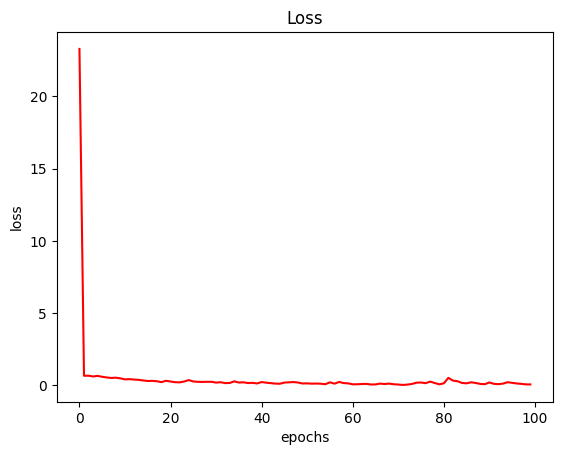

In [57]:
plt.title('Loss')
plt.plot(alex_history.history['loss'], 'r')
# plt.plot(alex_history.history['val_loss'], 'b')
plt.xlabel("epochs")
plt.ylabel("loss")

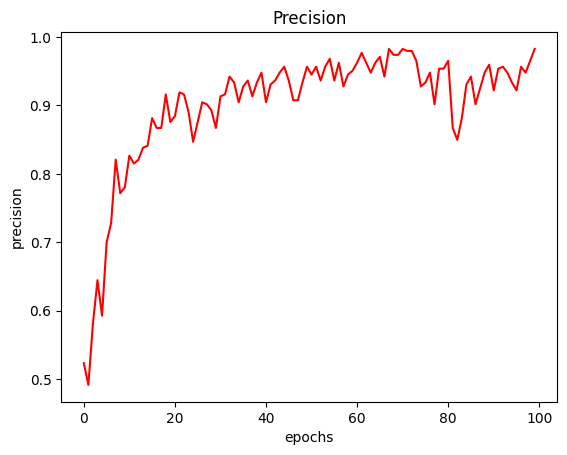

In [58]:
plt.title('Precision')
plt.plot(alex_history.history['precision_2'], 'r')
# plt.plot(alex_history.history['val_precision_1'], 'b')
plt.xlabel("epochs")
plt.ylabel("precision")
plt.show()

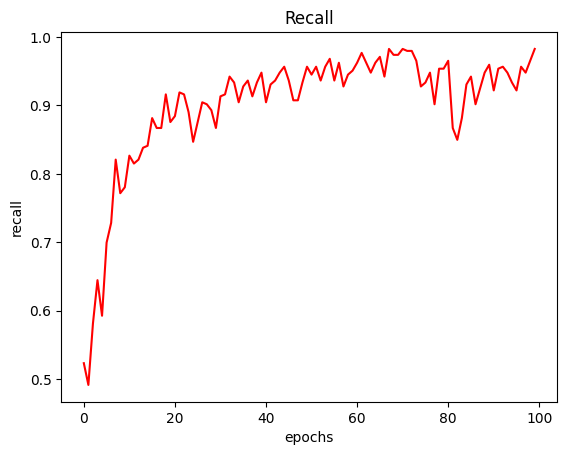

In [59]:
plt.title('Recall')
plt.plot(alex_history.history['recall_2'], 'r')
# plt.plot(alex_history.history['val_recall_1'], 'b')
plt.xlabel("epochs")
plt.ylabel("recall")
plt.show()

# 6) Prediction:

1/1 [==============================] - 0s 171ms/step


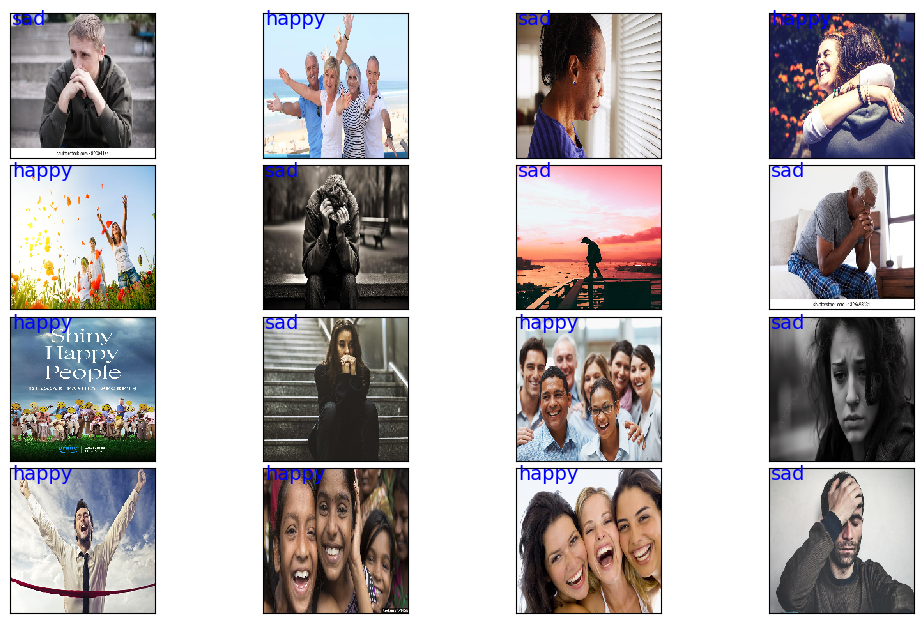

In [60]:
class_names = ["happy", "sad"]

X_test, label_batch = next(iter(val_generator))
prediction_values = AlexNet.predict(X_test)


# set up plot
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 227x227 pixels
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:],cmap=plt.cm.gray_r, interpolation='nearest')

    if np.argmax(prediction_values[i]) == np.argmax(label_batch[i]):
        # label the image with the blue text
        ax.text(3, 17, class_names[np.argmax(prediction_values[i])], color='blue', fontsize=14)
    else:
        # label the image with the red text
        ax.text(3, 17, class_names[np.argmax(prediction_values[i])], color='red', fontsize=14)